# Clustering Jerárquico

## Los datos

Utilizaremos un conjunto de datos con las siguientes variables.

* CustomerID: número de cliente
* Genre: género
* Age: edad
* Annual Income (k$): ingreso anual en miles de USD
* Spending Score (1-100): calificación del cliente

In [1]:
# Importar las librerías
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importar los datos del centro comercial con pandas
dataset = pd.read_csv("Mall_Customers.csv")
X = dataset.iloc[:, [3, 4]].values
print(dataset)

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]


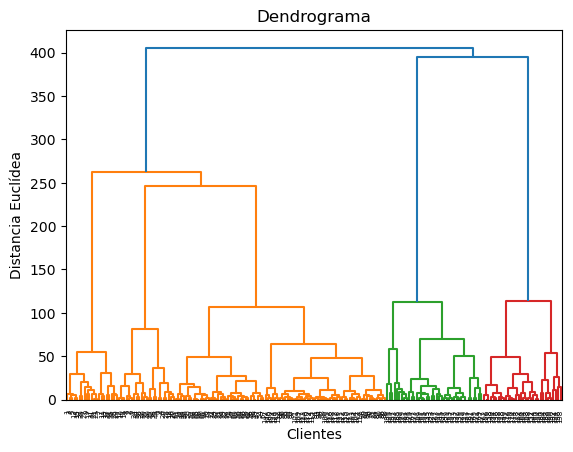

In [3]:
# Utilizar el dendrograma para encontrar el número óptimo de clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = "ward"))
plt.title("Dendrograma")
plt.xlabel("Clientes")
plt.ylabel("Distancia Euclídea")
plt.show()

In [4]:
# Ajustar el clustetring jerárquico a nuestro conjunto de datos
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, metric = "euclidean", linkage = "ward")
y_hc = hc.fit_predict(X)

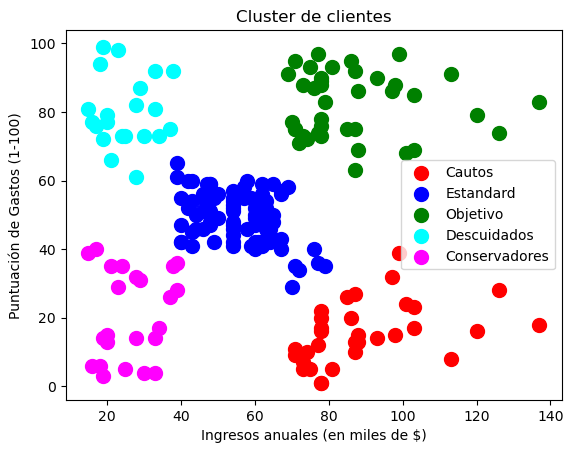

In [5]:
# Visualización de los clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = "red", label = "Cautos")
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = "blue", label = "Estandard")
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = "green", label = "Objetivo")
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = "cyan", label = "Descuidados")
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = "magenta", label = "Conservadores")
plt.title("Cluster de clientes")
plt.xlabel("Ingresos anuales (en miles de $)")
plt.ylabel("Puntuación de Gastos (1-100)")
plt.legend()
plt.show()